<img src="../../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Brain Observatory Workshop SWDB 2017 </h1> 
<h3 align="center">Tuesday, August 22, 2017</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>This notebook will introduce you to the Allen Brain Observatory dataset and SDK functions. 

<p>We want to look at signal correlations between all the neurons in a given experiment and see whether this is related to the distance between the cells.
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Drive path</h2>

<p>First things first - let's make sure your drive path is set up appropriately. You will want to un-comment only one of these options depending on which operating system you are running. You also may have to tweak the option for your specific set-up (e.g. change the drive letter for Windows).
</p>
</div>

In [1]:
#make sure your drive path is correct! 
# macOS/OS X
drive_path = '/Volumes/Brain2017/data/dynamic-brain-workshop/brain_observatory_cache/'

# Windows (a good guess)
# drive_path = 'e:/Brain2017/data/dynamic-brain-workshop/brain_observatory_cache'

# Linux (will vary; the following is possibly what Ubuntu will do)
# drive_path = '/media/Brain2017/data/dynamic-brain-workshop/brain_observatory_cache'

# AWS
# drive_path = '/data/dynamic-brain-workshop/brain_observatory_cache/'

In [9]:
# We need to import these modules to get started
import numpy as np
import pandas as pd
import os
import sys

# import matplotlib as mpl
# mpl.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

/Users/gabeo/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>The main entry point is the `BrainObservatoryCache` class.  This class is responsible for downloading any requested data or metadata as needed and storing it in well known locations.  For this workshop, all of the data has been preloaded onto the hard drives you have received.

<p>We begin by importing the `BrainObservatoryCache` class and instantiating it.

<p>`manifest_path` is a path to the manifest file.  We will use the manifest file preloaded onto your Workshop hard drives.  Make sure that `drive_path` is set correctly for your platform.  (See the first cell in this notebook.)
</div>


In [15]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = os.path.join(drive_path,'brain_observatory_manifest.json')
print manifest_file

boc = BrainObservatoryCache(manifest_file=manifest_file)

Volumes/Brain2017/data/dynamic-brain-workshop/brain_observatory_cache/brain_observatory_manifest.json


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 1.1:**  Get information about what's in the dataset from BrainObservatoryCache

<p>The following methods for BrainObservatoryCache retrieve the available depths, cre lines, areas, and stimuli.  Notice that these parameters outline the 'data cube'.
</div>

In [16]:
# Download a list of all targeted areas
targeted_structures = boc.get_all_targeted_structures()
print 'all targeted structures: ' + str(targeted_structures)

# Download a list of all imaging depths
depths = boc.get_all_imaging_depths()
print 'all imaging depths: ' + str(depths)

# Download a list of all cre driver lines 
cre_lines = boc.get_all_cre_lines()
print 'all cre lines: ' + str(cre_lines)

# Download a list of all stimuli
stims = boc.get_all_stimuli()
print 'all stimuli: ' + str(stims)

all targeted structures: [u'VISal', u'VISam', u'VISl', u'VISp', u'VISpm', u'VISrl']
all imaging depths: [175, 265, 275, 300, 320, 325, 335, 350, 365, 375, 435]
all cre lines: [u'Cux2-CreERT2', u'Emx1-IRES-Cre', u'Nr5a1-Cre', u'Rbp4-Cre_KL100', u'Rorb-IRES2-Cre', u'Scnn1a-Tg3-Cre']
all stimuli: ['drifting_gratings', 'locally_sparse_noise', 'locally_sparse_noise_4deg', 'locally_sparse_noise_8deg', 'natural_movie_one', 'natural_movie_three', 'natural_movie_two', 'natural_scenes', 'spontaneous', 'static_gratings']


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 1.2:**  Use tab completion in Jupyter to see what other methods the BrainObservatoryCache has.
</div>

In [ ]:
# Hit the 'tab' key with the cursor just after the '.'
boc.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Experiment containers</h2>
<p>The experiment container describes a set of 3 experiment sessions performed at the same location (targeted area and imaging depth) in the same mouse that targets the same set of cells. Each experiment container has a unique ID number.
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 1.3:**  Choose a visual area and Cre line from the lists above to examine in the rest of the notebook
</div>

In [5]:
visual_area = 'VISp'
cre_line ='Cux2-CreERT2'

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 1.4:**  Get the list of all the experiment containers for that area and Cre line combination.
</div>

In [6]:
exps = boc.get_experiment_containers(targeted_structures=[visual_area], cre_lines=[cre_line])

In [7]:
#make a pandas DataFrame to see what information we have on these experiments
pd.DataFrame(exps)

,cre_line,donor_name,failed,id,imaging_depth,reporter_line,specimen_name,tags,targeted_structure
0,Cux2-CreERT2,222426,False,511510736,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222426,[],VISp
1,Cux2-CreERT2,222420,False,511510667,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222420,[],VISp
2,Cux2-CreERT2,229106,False,511510855,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-229106,[],VISp
3,Cux2-CreERT2,243293,False,524691282,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-243293,[],VISp
4,Cux2-CreERT2,222420,False,511509529,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222420,[],VISp
5,Cux2-CreERT2,225037,False,511510670,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-225037,[],VISp
6,Cux2-CreERT2,244896,False,527550471,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-244896,[Epileptiform Events],VISp
7,Cux2-CreERT2,222424,False,511507650,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222424,[],VISp
8,Cux2-CreERT2,244898,False,528959519,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-244898,[],VISp
9,Cux2-CreERT2,225037,False,511510699,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-225037,[],VISp


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 1.5:**  Pick a random experiment from this selection
</div>

In [8]:
expt_container_id = np.random.choice(exps)['id']
print expt_container_id

511510779


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 1.6:** Get information about all of the experiment <strong>sessions</strong> in your experiment <strong>container</strong>.  This is accomplished with the `get_ophys_experiments` method.  
</div>

In [9]:
expt_session_info = boc.get_ophys_experiments(experiment_container_ids=[expt_container_id])
print(expt_session_info)
print len(expt_session_info)

[{'imaging_depth': 275, 'experiment_container_id': 511510779, 'reporter_line': u'Ai93(TITL-GCaMP6f)', 'targeted_structure': u'VISp', 'cre_line': u'Cux2-CreERT2', 'session_type': u'three_session_C', 'donor_name': u'225036', 'id': 502634578, 'acquisition_age_days': 96, 'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-225036'}, {'imaging_depth': 275, 'experiment_container_id': 511510779, 'reporter_line': u'Ai93(TITL-GCaMP6f)', 'targeted_structure': u'VISp', 'cre_line': u'Cux2-CreERT2', 'session_type': u'three_session_A', 'donor_name': u'225036', 'id': 503109347, 'acquisition_age_days': 101, 'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-225036'}, {'imaging_depth': 275, 'experiment_container_id': 511510779, 'reporter_line': u'Ai93(TITL-GCaMP6f)', 'targeted_structure': u'VISp', 'cre_line': u'Cux2-CreERT2', 'session_type': u'three_session_B', 'donor_name': u'225036', 'id': 503019786, 'acquisition_age_days': 101, 'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-225036'}]
3


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>`get_experiment_containers` returns a list of dictionaries that contain information about <b>experiment containers</b>.

<p>`get_ophys_experiments` returns a list of dictionaries that contain information about <b>experiment sessions</b>.  Here we are using keyword arguments to return just those experiment sessions that belong to our experiment container. We could have used targeted structures and Cre lines to find all the experiment sessions in our chosen location.
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 1.7:** Create a dataframe of the experiment sessions in your chosen container.  
</div>

In [10]:
expt_session_info_df = pd.DataFrame(expt_session_info)
expt_session_info_df

,acquisition_age_days,cre_line,donor_name,experiment_container_id,id,imaging_depth,reporter_line,session_type,specimen_name,targeted_structure
0,96,Cux2-CreERT2,225036,511510779,502634578,275,Ai93(TITL-GCaMP6f),three_session_C,Cux2-CreERT2;Camk2a-tTA;Ai93-225036,VISp
1,101,Cux2-CreERT2,225036,511510779,503109347,275,Ai93(TITL-GCaMP6f),three_session_A,Cux2-CreERT2;Camk2a-tTA;Ai93-225036,VISp
2,101,Cux2-CreERT2,225036,511510779,503019786,275,Ai93(TITL-GCaMP6f),three_session_B,Cux2-CreERT2;Camk2a-tTA;Ai93-225036,VISp


How many sessions are in your experiment container? What is different about each session? 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1.3:**  Find the session id for the session that has Natural Scenes as a stimulus for your chosen experiment container.  Save this as `session_id`. (Hint: you can either know which session type contains the Natural Scenes stimulus, or you can use the stimulus to select the experiment session)
</div>

In [11]:
session_id = boc.get_ophys_experiments(experiment_container_ids=[expt_container_id], stimuli=['natural_scenes'])[0]['id']
print session_id 

503019786


In [12]:
session_id = expt_session_info_df[expt_session_info_df.session_type=='three_session_B'].id.values[0]
print session_id

503019786


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>We will be using the session you have recorded in `session_id` for much of the remainder of this notebook.

<h2>The Dataset Object</h2>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 2.1:**  Create a data_set object for this experiment session.

The data_set object contains methods and info for a single experiment session (one of the 3 in the experiment container)
</div>

In [14]:
# make a data_set object
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 2.2:** Use either `dir` or tab-completion to find out what methods the new `data_set` object has.
</div>

In [ ]:
data_set.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>Using the methods you find, perform the following exercises.
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.1:** Get the metadata for your data set. How old was the mouse in this experiment?  Was it male or female?  
</div>

In [17]:
md = data_set.get_metadata()
print md
print "age:", md['age_days']
print "sex:", md['sex']

{'imaging_depth_um': 275, 'fov': u'400x400 microns (512 x 512 pixels)', 'genotype': u'Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/Ai93(TITL-GCaMP6f)', 'ophys_experiment_id': 503019786, 'session_type': u'three_session_B', 'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-225036', 'pipeline_version': u'2.0', 'excitation_lambda': u'910 nanometers', 'indicator': u'GCaMP6f', 'sex': u'male', 'device': u'Nikon A1R-MP multiphoton microscope', 'experiment_container_id': 511510779, 'targeted_structure': u'VISp', 'cre_line': u'Cux2-CreERT2/wt', 'device_name': u'CAM2P.2', 'age_days': 101, 'session_start_time': datetime.datetime(2016, 2, 21, 17, 41, 47)}
age: 101
sex: male


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.3:** Get the max projection image for your data set. Display it.
</div>

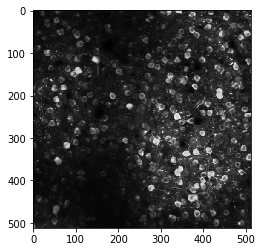

In [18]:
max_proj = data_set.get_max_projection()
plt.imshow(max_proj, cmap='gray')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.5:** Get the roi mask for all the cells.  (Hint:  There are two methods that return roi masks.  In one of them masks are returned as lists of python objects.  What methods do they have?  What is the type of this object?)  What is the size and shape of the mask? How many cells are in this experiment session?
</div>

In [19]:
rois = data_set.get_roi_mask_array()
print rois.shape
print "Number of cells:", rois.shape[0]

(359, 512, 512)
Number of cells: 359


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.6:** Pick one cell (at random) and plot the mask overlayed on the max projection.  (Hint:  imshow has an optional parameter called `alpha`.) What is the structure of the mask - how can you find the position of the mask?
</div>

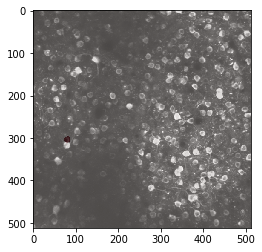

In [21]:
plt.imshow(max_proj, cmap='gray')
plt.imshow(rois[12,:,:], cmap='Reds', alpha=0.3)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.7:** Calculate the centroid of the ROI mask. Verify that you've calculated this properly by plotting it on top of the mask
</div>

In [23]:
centroid_x = np.where(rois[12,:,:])[1].mean()
centroid_y = np.where(rois[12,:,:])[0].mean()

(59.38095238095238, 99.38095238095238)

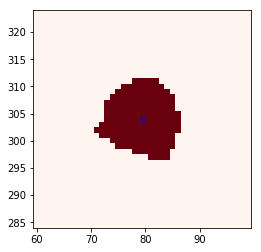

In [24]:
plt.imshow(rois[12,:,:], cmap='Reds')
plt.plot(centroid_x, centroid_y, 'bx')
plt.ylim(centroid_y-20,centroid_y+20)
plt.xlim(centroid_x-20,centroid_x+20)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.7:** Find the centroid of each roi mask and calculate the distance between all the ROIs
</div>

In [25]:
num_cells = rois.shape[0]
loc_x = np.zeros((num_cells))
loc_y = np.zeros((num_cells))

for i in range(num_cells):
    ind = np.where(rois[i])
    loc_x[i] = np.mean(ind[1])
    loc_y[i] = np.mean(ind[0])

distance = np.zeros((num_cells, num_cells))
for i in range(num_cells):
    for j in range(num_cells):
        distance[i, j] = np.sqrt( (loc_x[i]-loc_x[j])**2 + (loc_y[i]-loc_y[j])**2 )

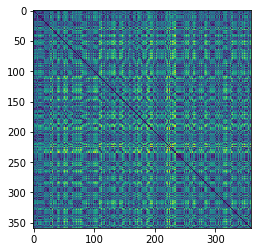

In [26]:
plt.imshow(distance, cmap='viridis', interpolation='none')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.8:** Plot the distribution of distances. Only count each distance once! (Hint: numpy has functions to select the upper or lower triangle of an array. Look for triu, or triu_indices. Be sure to eliminate the diagonal itself)
</div>

In [27]:
np.triu_indices(num_cells, k=1)  

(array([  0,   0,   0, ..., 356, 356, 357]),
 array([  1,   2,   3, ..., 357, 358, 358]))

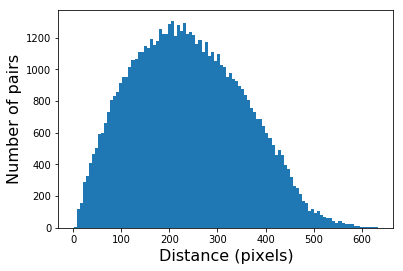

In [28]:
plt.figure()
inds = np.triu_indices(num_cells, k=1) 
plt.hist(distance[inds[0], inds[1]], bins=100)
plt.xlabel("Distance (pixels)", fontsize=16)
plt.ylabel("Number of pairs", fontsize=16)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>The Analysis Object</h2>


<p>The analysis objects summarize the trial data for a stimulus type and provide convenient DataFrame objects.  
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 3.1:**  Import the `NaturalScenes` object and instatiate it with `data_set`.
</div>

In [29]:
from allensdk.brain_observatory.natural_scenes import NaturalScenes
ns = NaturalScenes(data_set)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.1:** Get the "signal correlations" of the responses to natural scenes. You can opt for pearson or spearman - pearson is faster but spearman is better. (Either this way will take a bit of time to run - this is a great time for a bathroom break) What is the shape of this object?  The methods will return a tuple of length two.  The first value is the signal correlation, the second the p values for .
</div>

In [30]:
sc, sc_p = ns.get_signal_correlation(corr='pearson')

In [31]:
print sc.shape
print sc_p.shape

(359, 359)
(359, 359)


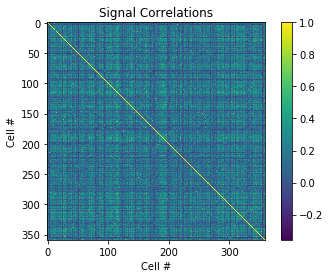

In [32]:
plt.imshow(sc, cmap='viridis', interpolation='none')
plt.xlabel("Cell #")
plt.ylabel("Cell #")
plt.title("Signal Correlations")
plt.colorbar()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.2:** Plot the signal correlation vs distance for all pairs of cells.
</div>

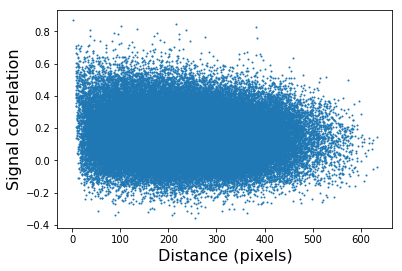

In [33]:
plt.figure()
plt.plot(distance[inds[0], inds[1]], sc[inds[0], inds[1]], '.', markersize=2.)
plt.xlabel("Distance (pixels)", fontsize=16)
plt.ylabel("Signal correlation", fontsize=16)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.3:** Find the most signal-correlated pair of neurons in this experiment and plot their ROIs.
</div>

[81]
[217]


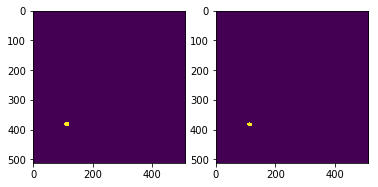

In [44]:
sc_temp = np.triu(sc, k=1)
(cell_id_1, cell_id_2) = np.where(sc_temp == np.amax(sc_temp))
print cell_id_1
print cell_id_2
plt.subplot(121)
plt.imshow(rois[cell_id_1[0],:,:])
plt.subplot(122)
plt.imshow(rois[cell_id_2[0],:,:])


We want to look at the trial-by-trials responses of these cells to their preferred stimuli. To do this we're going to pull out the responses from our analysis object.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>sweep_response is a DataFrame that contains the dF/F response of each cell during each stimulus trial. It shares its index with stim_table. Each cell contains a timeseries that extends from 1 second prior to the start of the trial to 1 second after the end of the trial. The sweep_response table is organized as cells (columns) for each sweep (rows)

<p>mean_sweep_response provides the time-averaged dF/F for each trial.

<p>The stimulus_table object contains information about the stimulus. Use data_set.get_stimulus_table('natural_scenes') to get this object. What does it contain?
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.4:** Get the mean sweep responses of your two cells to natural images. What shape are these?
</div>

In [51]:
mean_sweep_response = ns.mean_sweep_response
mean_sweep_response.shape

(5950, 360)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.5:** Get the natural scenes stimulus table. What shape is it? What are its columns?
</div>

In [46]:
stim_table = data_set.get_stimulus_table('natural_scenes')
stim_table.shape
stim_table.keys()

Index([u'frame', u'start', u'end'], dtype='object')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.6:** Use the stimulus table to get the mean sweep responses to natural image 10. Plot your two cells' mean sweep responses to it.
</div>

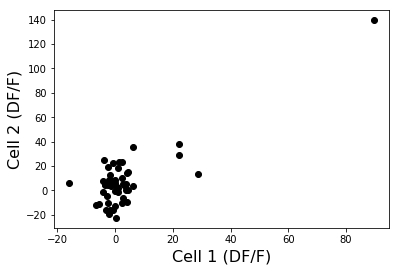

In [48]:
mean_sweep_response_im1 = mean_sweep_resp[stim_table['frame'] == 5]
mean_sweep_response_im1[str(cell_id_1[0])]
plt.figure()
plt.plot(mean_sweep_response_im1[str(cell_id_1[0])], mean_sweep_response_im1[str(cell_id_2[0])], 'ko')
plt.xlabel("Cell 1 (DF/F)", fontsize=16)
plt.ylabel("Cell 2 (DF/F)", fontsize=16)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.7:** Get the trial-averaged mean sweep responses to each natural scene for your two cells. (Hint: in addition to using mean_sweep_response and the stimulus table, try checking ns.response.)
</div>

In [49]:
np.unique(stim_table.frame)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117])

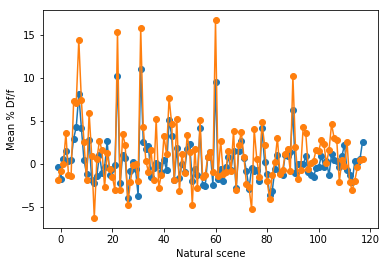

In [53]:
stims = np.unique(stim_table.frame)

mean_resp = np.empty((len(stims),2))
for i,v in enumerate(stims):
    mean_resp[i,0] = mean_sweep_response[stim_table.frame==v][str(cell_id_1[0])].mean()
    mean_resp[i,1] = mean_sweep_response[stim_table.frame==v][str(cell_id_2[0])].mean()

plt.plot(stims, mean_resp[:,0], 'o-')
plt.plot(stims, mean_resp[:,1], 'o-')
plt.xlabel('Natural scene')
plt.ylabel('Mean % Df/f')
    

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.8:** Plot the neurons' preferred images. (Hint: get the stimulus_template object from the data_set. What shape is it?) (Hint2: pay attention to the image indices and the frame labels in the stimulus table)
</div>

In [56]:
pref_stim_1 = stims[np.argmax(mean_resp[:,0])]
pref_stim_2 = stims[np.argmax(mean_resp[:,1])]
print pref_stim_1
print pref_stim_2

31
60


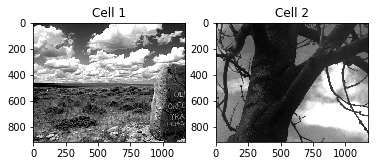

In [58]:
stim_template = data_set.get_stimulus_template('natural_scenes')

fig, ax = plt.subplots(1, 2)
ax[0].imshow(stim_template[pref_stim_1], cmap='gray')
ax[0].set_title("Cell 1")
ax[1].imshow(stim_template[pref_stim_2], cmap='gray')
ax[1].set_title("Cell 2")

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.9:** Plot the two neurons' trial-by-trial sweep responses to their preferred images. 
</div>

In [59]:
sweep_response = ns.sweep_response

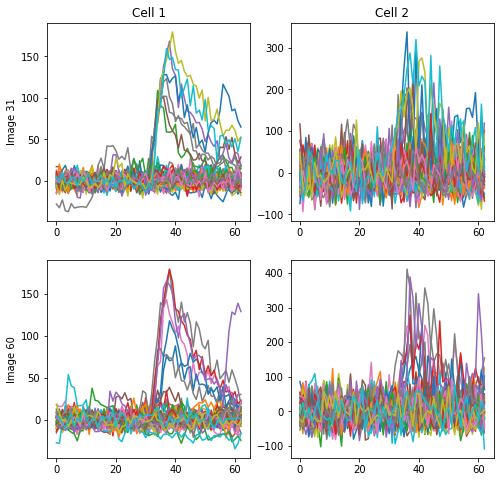

In [71]:
plt.figure(figsize=(8,8))
sweeps = sweep_response[stim_table.frame==pref_stim_1]
plt.subplot(221)
for i in range(len(sweeps)):
    plt.plot(sweeps[str(cell_id_1[0])].iloc[i])
plt.title("Cell 1")
plt.ylabel("Image "+str(pref_stim_1))
plt.subplot(222)
for i in range(len(sweeps)):
    plt.plot(sweeps[str(cell_id_2[0])].iloc[i])
plt.title("Cell 2")
sweeps = sweep_response[stim_table.frame==pref_stim_2]
plt.subplot(223)
for i in range(len(sweeps)):
    plt.plot(sweeps[str(cell_id_1[0])].iloc[i])
plt.ylabel("Image "+str(pref_stim_2))
plt.subplot(224)
for i in range(len(sweeps)):
    plt.plot(sweeps[str(cell_id_2[0])].iloc[i])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Mouse Behavior</h2>


<p>The data_set and analysis objects also contain information about the mouse's running speed and eye tracking. (Not all experiments have eye tracking information.) The running speed, eye position and pupil size can be extracted from the data_set object using appropriately named functions. The running speed has been analyzed the same way as each fluorescent trace, and contained in the final column of the sweep_response and mean_sweep_response dataframes named "dx". 
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 4.1:** Plot the mouse's running speed over the whole experiment and on the same trials you looked at responses of above.
</div>

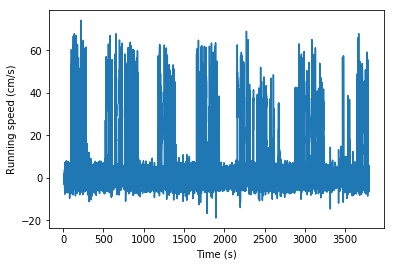

In [72]:
dxcm, dxcm_t = data_set.get_running_speed()

plt.figure()
plt.plot(dxcm_t, dxcm)
plt.xlabel("Time (s)")
plt.ylabel("Running speed (cm/s)")

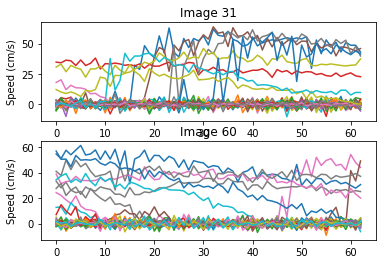

In [76]:
sweeps = sweep_response[stim_table.frame==pref_stim_1]
plt.subplot(211)
for i in range(len(sweeps)):
    plt.plot(sweeps['dx'].iloc[i])
plt.title("Image "+str(pref_stim_1))
plt.ylabel("Speed (cm/s)")

sweeps = sweep_response[stim_table.frame==pref_stim_2]
plt.subplot(212)
for i in range(len(sweeps)):
    plt.plot(sweeps['dx'].iloc[i])
plt.title("Image "+str(pref_stim_2))
plt.ylabel("Speed (cm/s)")

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 4.2:** Check if your experiment has information about the mouse's pupil diameter. If so, plot it on the sweeps of each neuron's preferred image.
</div>

In [89]:
pupil_size_t, pupil_size = data_set.get_pupil_size()

NoEyeTrackingException: No pupil tracking for this experiment.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>The Cell Specimens Object</h2>


<p>The cell specimens object contains summary information about all cells in the brain observatory dataset. Let's find your two cells in it and compare them! First, load the cell_specimens object and see what types of information it contains about each cell.
</div>

In [83]:
cell_specimens = pd.DataFrame(boc.get_cell_specimens())
print cell_specimens.keys()

Index([u'all_stim', u'area', u'cell_specimen_id', u'donor_full_genotype',
       u'dsi_dg', u'experiment_container_id', u'failed_experiment_container',
       u'g_dsi_dg', u'g_osi_dg', u'g_osi_sg', u'image_sel_ns',
       u'imaging_depth', u'osi_dg', u'osi_sg', u'p_dg', u'p_ns',
       u'p_run_mod_dg', u'p_run_mod_ns', u'p_run_mod_sg', u'p_sg',
       u'peak_dff_dg', u'peak_dff_ns', u'peak_dff_sg', u'pref_dir_dg',
       u'pref_image_ns', u'pref_ori_sg', u'pref_phase_sg', u'pref_sf_sg',
       u'pref_tf_dg', u'reliability_dg', u'reliability_nm1_a',
       u'reliability_nm1_b', u'reliability_nm1_c', u'reliability_nm2',
       u'reliability_nm3', u'reliability_ns', u'reliability_sg',
       u'rf_area_off_lsn', u'rf_area_on_lsn', u'rf_center_off_x_lsn',
       u'rf_center_off_y_lsn', u'rf_center_on_x_lsn', u'rf_center_on_y_lsn',
       u'rf_chi2_lsn', u'rf_distance_lsn', u'rf_overlap_index_lsn',
       u'run_mod_dg', u'run_mod_ns', u'run_mod_sg', u'sfdi_sg', u'specimen_id',
       u'tfdi_

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 5.1:** Find your two cells' cell specimen ids in the data_set object.
</div>

In [77]:
cell_specimen_ids = [data_set.get_cell_specimen_ids()[cell_id_1[0]], data_set.get_cell_specimen_ids()[cell_id_2[0]]]
print cell_specimen_ids

[517517459, 517517744]


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 5.2:** Get the cell_specimens information for just your two cells. (Hint: when you create the cell_specimens object, you can filter by cell specimen id.) What is each of their response reliability for natural scenes? How does it compare to their reliability for static gratings?
</div>

In [84]:
cell_specimens1 = boc.get_cell_specimens(ids=cell_specimen_ids)

print [x['reliability_ns'] for x in cell_specimens1]
print [x['reliability_sg'] for x in cell_specimens1]

[0.0625914845738262, 0.0084527334881286]
[-0.00210056960395687, -0.000101337705350395]


<div style=\"border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; \">
<h2>Project Ideas</h2>
<p>Here are some ideas to get you started in thinking about your projects.
</div>

<li> How do cells' responses differ across regions, layers, and Cre lines?  How best can these differences be captured?
    <li> What is the distribution of feature responses?  How does preferred orientation, say, vary across regions, layers, and Cre lines?
    <li> Do the responses to one type of stimulus allow us to predict the responses to a different type?  Are grating responses consistent with natural image responses?
    <li> Can you distinguish \"simple\" and \"complex\" cells in the dataset?  What is the right model or metric to use?
    <li> Characterize the cross correlations (both \"noise\" and \"signal\" correlations) in the data set.  Can you model this variability?
    <li> Develop models of stimulus response that control for running speed or include temporal dynamics.
    <li> How well can you identify the stimulus category given the activity of a set of neurons within an experiment, i.e. can you \"decode\" the stimulus?  What is the best way to do this?  What features are necessary?  Can you identify cells that carry \"more\" information about stimuli?
    <li> What population metrics are useful for describing the data?  Can you model the population activity?
    <li> What is the best way to visualize the activity of many cells in an experiment?  Is there a useful dimensional reduction that can help you?
